### 캘리포니아 집값 예측: Regression
- regression method: supervised learning
- resgssion algorithm: linear-regression if need polynomial-regression
- goal: predict californai house value
- feature: nudetermined
- label: medial_house_value
- 
- scaling: true
- scaling algorithm: minmax, standard, robust
- cross validation: undetermined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [2]:
FILE_PATH = '../data/california_housing.csv'
data_df = pd.read_csv(FILE_PATH)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
data_df.duplicated().sum()

0

In [9]:
name = data_df.columns
name = name.drop(name[-1])
name

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

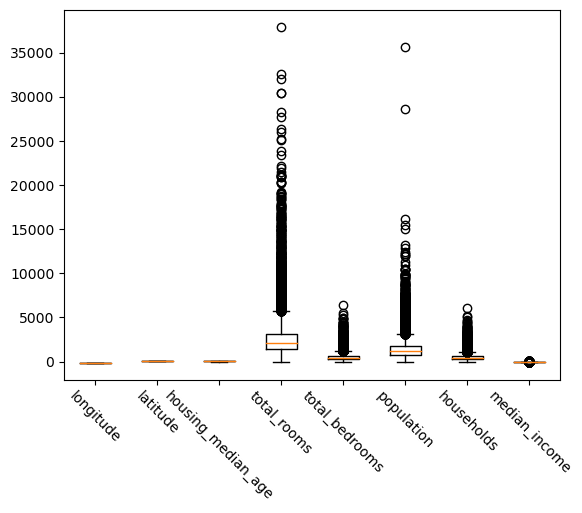

In [15]:
plt.boxplot(data_df.iloc[:, :-1])
plt.xticks(np.arange(1, len(name)+1), name, rotation=-45)
plt.show()

In [18]:
name2 = name.drop(name[0:3])
name2 = name2.drop(name2[-1])
name2

Index(['total_rooms', 'total_bedrooms', 'population', 'households'], dtype='object')

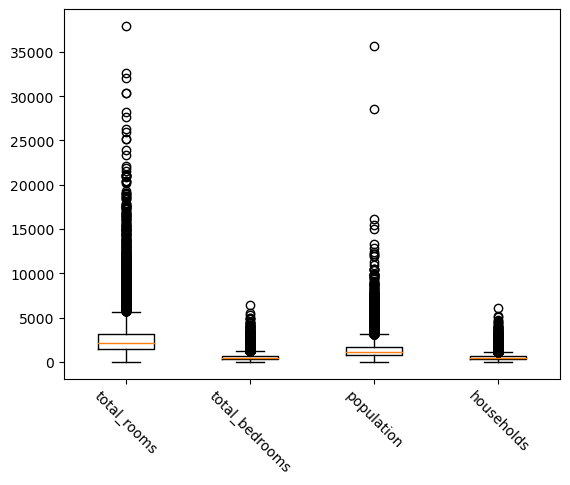

In [25]:
plt.boxplot(data_df.iloc[:, 3:7])
plt.xticks(np.arange(1, 5), name2, rotation=-45)
plt.show()

In [28]:
name3 = [x for x in name if x not in name2]
name3

['longitude', 'latitude', 'housing_median_age', 'median_income']

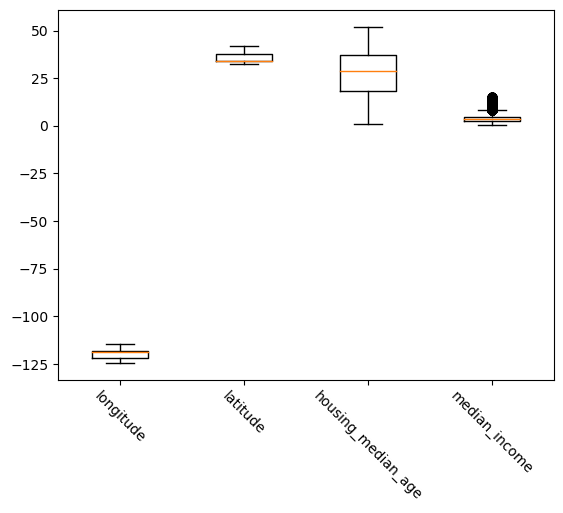

In [29]:
plt.boxplot(data_df.loc[:, name3])
plt.xticks(np.arange(1, 5), name3, rotation=-45)
plt.show()

- 이상치라고 할 수 있을까..?

In [31]:
corr = data_df.corr(numeric_only=True)
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [32]:
# hetmap
import seaborn as sns

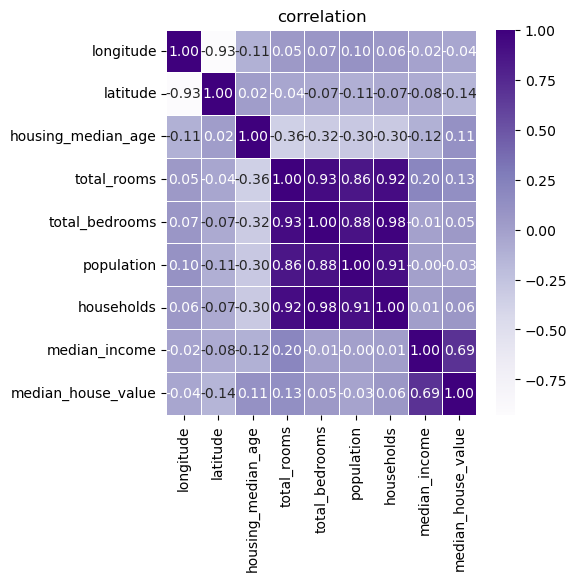

In [35]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('correlation')
plt.show()

- feature는 'median_income'으로 결정

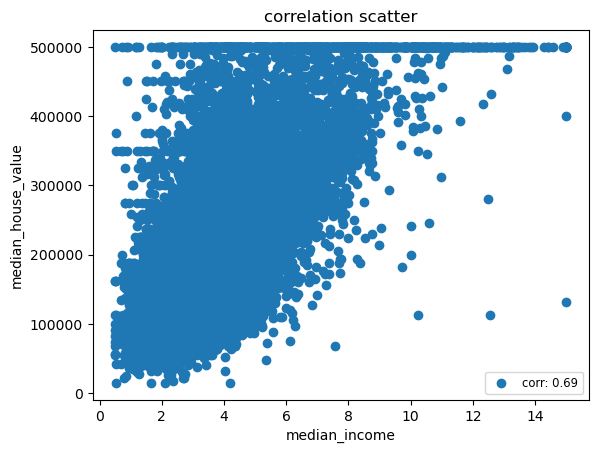

In [39]:
plt.scatter(data_df['median_income'], data_df['median_house_value'], label=f'corr: {corr.iloc[-1, -2]:.2f}')
plt.title('correlation scatter')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.legend(fontsize='small')
plt.show()

In [41]:
# feature & label
feature = data_df[['median_income']]
label = data_df['median_house_value']

print(f"feature shape: {feature.shape}, {feature.ndim}D")
print(f"label shape: {label.shape}, {label.ndim}D")

feature shape: (17000, 1), 2D
label shape: (17000,), 1D


In [44]:
# train : test = 7 : 3
# radom_state: True, 34
# cross validation: Flase
# but train : validation data = 8 : 2

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=34)

print(f"X train shape: {X_train.shape}, {X_train.ndim}D")
print(f"X test shape: {X_test.shape}, {X_test.ndim}D")
print(f"y train shape: {y_train.shape}, {y_train.ndim}D")
print(f"y test shape: {y_test.shape}, {y_test.ndim}D")
print(f"train & test ratio: {len(X_train)/len(feature)*100:.2f} %, {len(X_test)/len(feature)*100:.2f} %\n")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)
print(f"X train shape: {X_train.shape}, {X_train.ndim}D")
print(f"X val shape: {X_val.shape}, {X_val.ndim}D")
print(f"y train shape: {y_train.shape}, {y_train.ndim}D")
print(f"y val shape: {y_val.shape}, {y_val.ndim}D")
print(f"train & val ratio: {len(X_train)/(len(X_train)+len(X_val))*100:.2f} %, {len(X_val)/(len(X_train)+len(X_val))*100:.2f} %\n")


X train shape: (11900, 1), 2D
X test shape: (5100, 1), 2D
y train shape: (11900,), 1D
y test shape: (5100,), 1D
train & test ratio: 70.00 %, 30.00 %

X train shape: (9520, 1), 2D
X val shape: (2380, 1), 2D
y train shape: (9520,), 1D
y val shape: (2380,), 1D
train & val ratio: 80.00 %, 20.00 %



In [45]:
# minmax, standard, robust
# sclaer instance
mm_scaler = MinMaxScaler()
sd_scaler = StandardScaler()
rb_scler = RobustScaler()

In [46]:
mm_scaler.fit(X_train, X_val)

MinMaxScaler()

In [47]:
sd_scaler.fit(X_train, X_val)

StandardScaler()

In [48]:
rb_scler.fit(X_train, X_val)

RobustScaler()

In [50]:
# fransform
mm_X_train = mm_scaler.transform(X_train)
mm_X_test = mm_scaler.transform(X_test)
mm_X_val = mm_scaler.transform(X_val)

sd_X_train = sd_scaler.transform(X_train)
sd_X_test = sd_scaler.transform(X_test)
sd_X_val = sd_scaler.transform(X_val)

rb_X_train = rb_scler.transform(X_train)
rb_X_test = rb_scler.transform(X_test)
rb_X_val = rb_scler.transform(X_val)

re_y_train = y_train.reset_index(drop=True)
re_y_test = y_test.reset_index(drop=True)
re_y_val = y_val.reset_index(drop=True)

In [51]:
# model load
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

- non scaling

In [53]:
# model instance
non_model = LinearRegression()
non_model.fit(X_train, y_train)

LinearRegression()

In [56]:
# after learning
non_gradient = non_model.coef_
non_bias = non_model.intercept_
print(non_gradient, non_bias, non_model.feature_names_in_, non_model.singular_, sep='\n')

[42244.15814834]
43938.80060464074
['median_income']
[188.77675468]


In [62]:
# performance evaluation
non_prediction = non_model.predict(X_test)

non_mae = mean_absolute_error(y_test, non_prediction)
non_mse = mean_squared_error(y_test, non_prediction)
non_rmse = mean_squared_error(y_test, non_prediction, squared=False)
non_r2_score = r2_score(y_test, non_prediction)
non_train_score = non_model.score(X_val, y_val)

print(f"non scaling MAE: {non_mae:.4f}")
print(f"non scaling MSE: {non_mse:.4f}")
print(f"non scaling RMSE: {non_rmse:.4f}")
print(f"non scaling R2 Score: {non_r2_score*100:.2f} %")
print(f"non scaling train score: {non_train_score*100:.2f} %")

non scaling MAE: 61560.9823
non scaling MSE: 6765796639.9403
non scaling RMSE: 82254.4627
non scaling R2 Score: 47.71 %
non scaling train score: 46.54 %


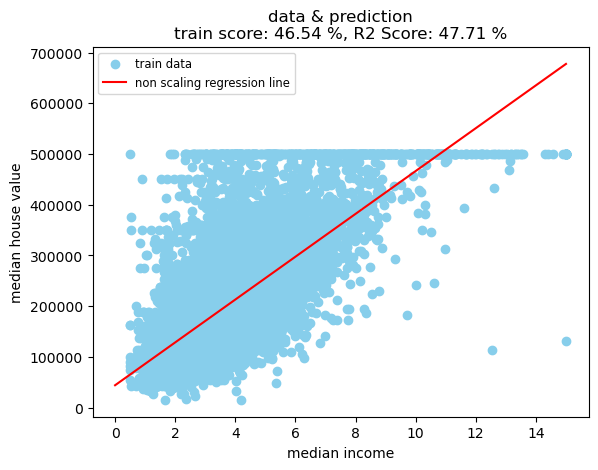

In [77]:
plt.scatter(X_train, y_train, color='skyblue', label='train data')

x = [0, 15]
y = [non_gradient * x[0] + non_bias, non_gradient * x[1] + non_bias]
plt.plot(x, y, color='red', label='non scaling regression line')

plt.title(f'data & prediction\ntrain score: {non_train_score*100:.2f} %, R2 Score: {non_r2_score*100:.2f} %')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.legend(fontsize='small')
plt.show()

- mimmax scaling

In [65]:
# model intance
mm_model = LinearRegression()
mm_model.fit(mm_X_train, y_train)

LinearRegression()

In [69]:
# after learning
mm_gradient = mm_model.coef_
mm_bias = mm_model.intercept_
print(mm_gradient, mm_bias, sep='\n')

[612548.74198254]
65056.65526299519


In [70]:
# performance evaluation
mm_prediction = mm_model.predict(mm_X_test)

mm_mae = mean_absolute_error(y_test, mm_prediction)
mm_mse = mean_squared_error(y_test, mm_prediction)
mm_rmse = mean_squared_error(y_test, mm_prediction, squared=False)
mm_r2_score = r2_score(y_test, mm_prediction)
mm_train_score = mm_model.score(mm_X_val, y_val)

print(f"minmax scaling MAE: {mm_mae:.4f}")
print(f"minmax scaling MSE: {mm_mse:.4f}")
print(f"minmax scaling RMSE: {mm_rmse:.4f}")
print(f"minmax scaling R2 Score: {mm_r2_score*100:.2f} %")
print(f"minmax scaling train score: {mm_train_score*100:.2f} %")

minmax scaling MAE: 61560.9823
minmax scaling MSE: 6765796639.9403
minmax scaling RMSE: 82254.4627
minmax scaling R2 Score: 47.71 %
minmax scaling train score: 46.54 %


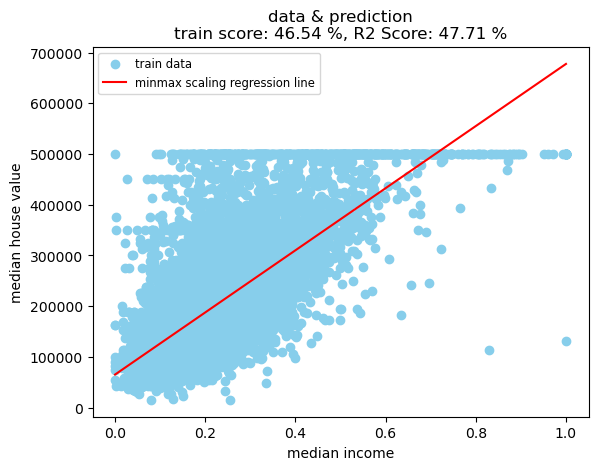

In [78]:
plt.scatter(mm_X_train, y_train, color='skyblue', label='train data')

x = [0, 1]
y = [mm_gradient * x[0] + mm_bias, mm_gradient * x[1] + mm_bias]
plt.plot(x, y, color='red', label='minmax scaling regression line')

plt.title(f'data & prediction\ntrain score: {mm_train_score*100:.2f} %, R2 Score: {mm_r2_score*100:.2f} %')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.legend(fontsize='small')
plt.show()

- standard scaling

In [72]:
# model instance
sd_model = LinearRegression()
sd_model.fit(sd_X_train, y_train)

LinearRegression()

In [73]:
# after learning
sd_gradient = sd_model.coef_
sd_bias = sd_model.intercept_
print(sd_gradient, sd_bias, sep='\n')

[81732.86100022]
208780.24086134453


In [74]:
# performance evaluation
sd_prediction = sd_model.predict(sd_X_test)

sd_mae = mean_absolute_error(y_test, sd_prediction)
sd_mse = mean_squared_error(y_test, sd_prediction)
sd_rmse = mean_squared_error(y_test, sd_prediction, squared=False)
sd_r2_score = r2_score(y_test, sd_prediction)
sd_train_score = sd_model.score(sd_X_val, y_val)

print(f"standard scaling MAE: {sd_mae:.4f}")
print(f"standard scaling MSE: {sd_mse:.4f}")
print(f"standard scaling RMSE: {sd_rmse:.4f}")
print(f"standard scaling R2 Score: {sd_r2_score*100:.2f} %")
print(f"standard scaling train score: {sd_train_score*100:.2f} %")

standard scaling MAE: 61560.9823
standard scaling MSE: 6765796639.9403
standard scaling RMSE: 82254.4627
standard scaling R2 Score: 47.71 %
standard scaling train score: 46.54 %


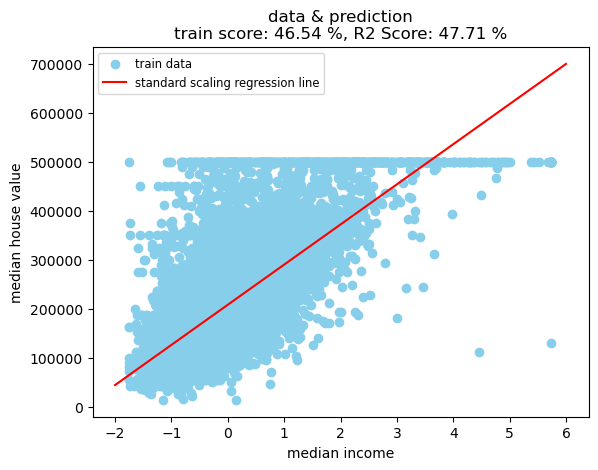

In [79]:
plt.scatter(sd_X_train, y_train, color='skyblue', label='train data')

x = [-2, 6]
y = [sd_gradient * x[0] + sd_bias, sd_gradient * x[1] + sd_bias]
plt.plot(x, y, color='red', label='standard scaling regression line')

plt.title(f'data & prediction\ntrain score: {sd_train_score*100:.2f} %, R2 Score: {sd_r2_score*100:.2f} %')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.legend(fontsize='small')
plt.show()

- robust scaling

In [81]:
# model instance
rb_model = LinearRegression()
rb_model.fit(rb_X_train, y_train)

LinearRegression()

In [82]:
# after learning
rb_gradient = rb_model.coef_
rb_bias = rb_model.intercept_
print(rb_gradient, rb_bias, sep='\n')

[93816.88251978]
194433.614008097


In [83]:
# performance evaluation
rb_prediction = rb_model.predict(rb_X_test)

rb_mae = mean_absolute_error(y_test, rb_prediction)
rb_mse = mean_squared_error(y_test, rb_prediction)
rb_rmse = mean_squared_error(y_test, rb_prediction, squared=False)
rb_r2_score = r2_score(y_test, rb_prediction)
rb_train_score = rb_model.score(rb_X_val, y_val)

print(f"robust scaling MAE: {rb_mae:.4f}")
print(f"robust scaling MSE: {rb_mse:.4f}")
print(f"robust scaling RMSE: {rb_rmse:.4f}")
print(f"robust scaling R2 Score: {rb_r2_score*100:.2f} %")
print(f"robust scaling train score: {rb_train_score*100:.2f} %")

robust scaling MAE: 61560.9823
robust scaling MSE: 6765796639.9403
robust scaling RMSE: 82254.4627
robust scaling R2 Score: 47.71 %
robust scaling train score: 46.54 %


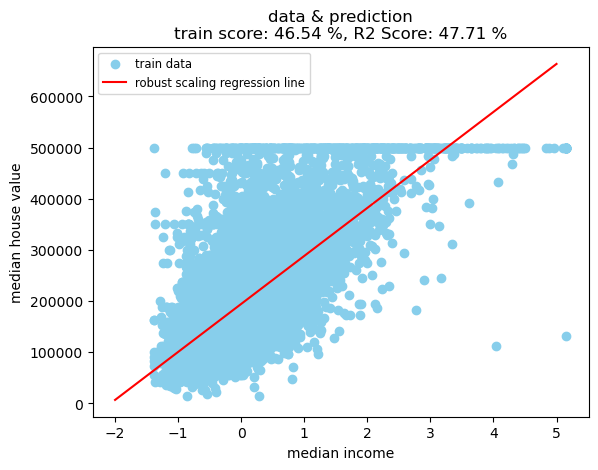

In [85]:
plt.scatter(rb_X_train, y_train, color='skyblue', label='train data')

x = [-2, 5]
y = [rb_gradient * x[0] + rb_bias, rb_gradient * x[1] + rb_bias]
plt.plot(x, y, color='red', label='robust scaling regression line')

plt.title(f'data & prediction\ntrain score: {rb_train_score*100:.2f} %, R2 Score: {rb_r2_score*100:.2f} %')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.legend(fontsize='small')
plt.show()

- polynomial regression...

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Degree 1 coef_: 42054.07
mae: 62914.116697321486
mse: 7026382771.541962
rmse: 83823.52158876386
R2 score: 0.4811613275773564



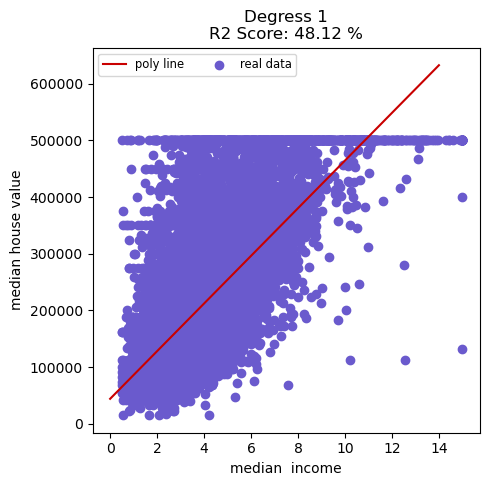

Degree 2 coef_: -1066.65
mae: 62285.3468248199
mse: 6858103516.5798645
rmse: 82813.66745036634
R2 score: 0.5043173988196679



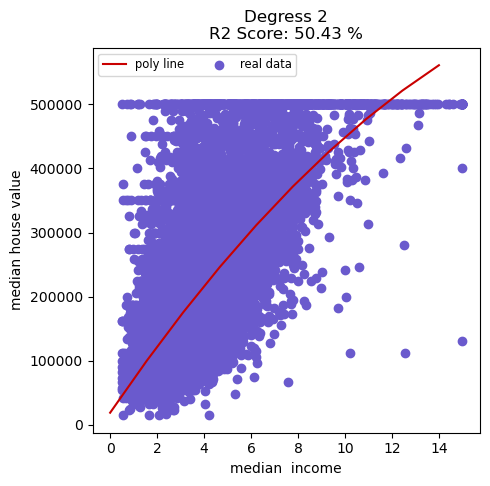

Degree 3 coef_: -353.91
mae: 61725.93217556475
mse: 6847279203.1805525
rmse: 82748.2882190354
R2 score: 0.4906517583726483



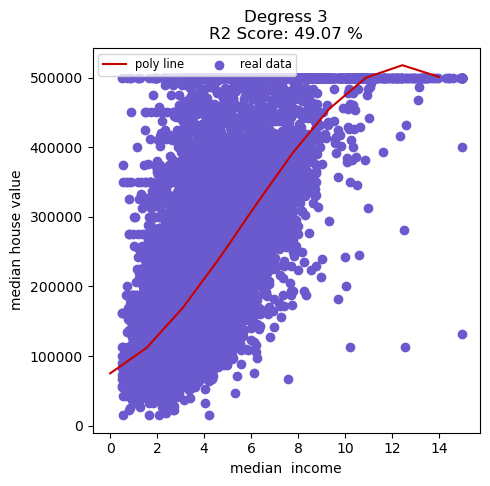

Degree 4 coef_: 9.27
mae: 61623.90400018478
mse: 6829676379.124665
rmse: 82641.85609680282
R2 score: 0.47631455058404926



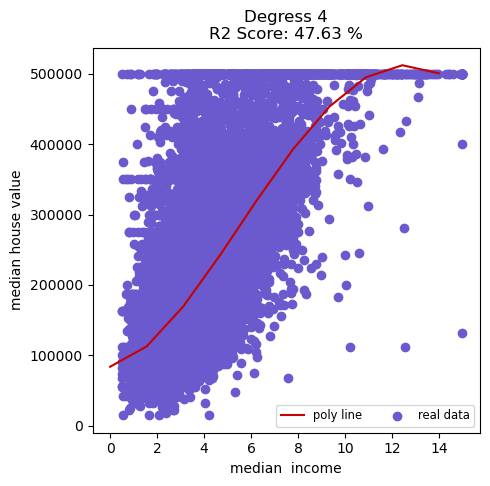

Degree 5 coef_: 3.41
mae: 62383.21857662025
mse: 6992351740.436944
rmse: 83620.28306838564
R2 score: 0.48802427025978157



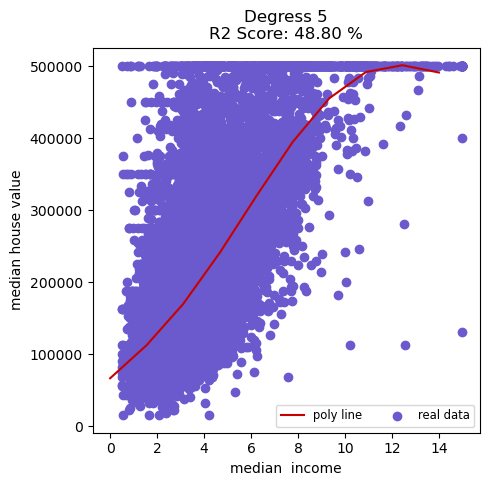

Degree 6 coef_: 3.08
mae: 62269.45372917495
mse: 7078482693.442869
rmse: 84133.7191228515
R2 score: 0.48870448903058306



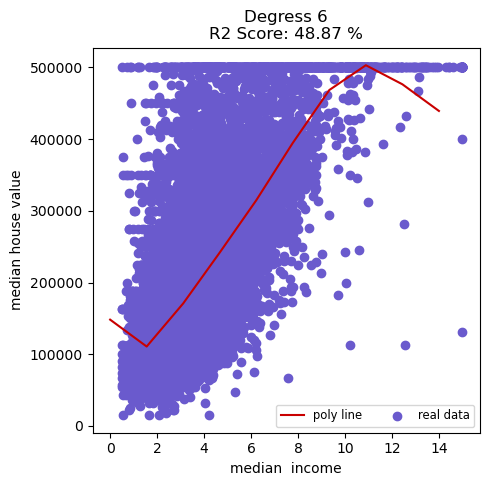

Degree 7 coef_: -1.13
mae: 61347.848560038634
mse: 6674233300.490983
rmse: 81695.98093230158
R2 score: 0.503892761088599



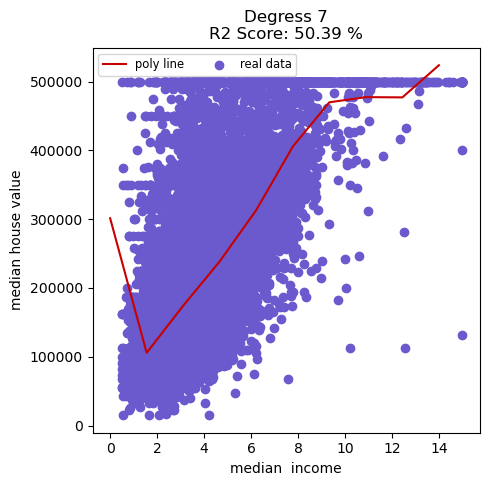

Degree 8 coef_: 0.10
mae: 60380.29833898987
mse: 6592460656.084645
rmse: 81193.96933322477
R2 score: 0.5055882279589734



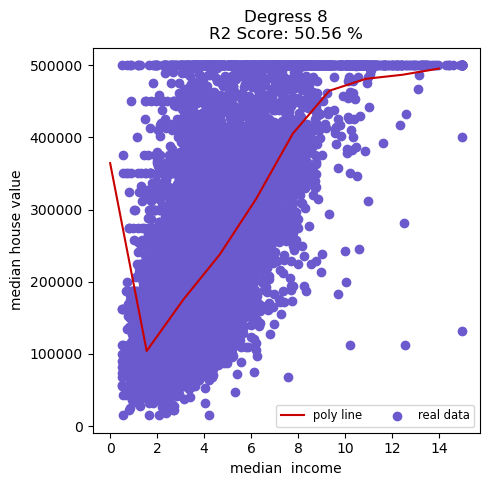

Degree 9 coef_: 0.01
mae: 61427.63594438866
mse: 6937877854.340883
rmse: 83293.92447436297
R2 score: 0.4960862144845124



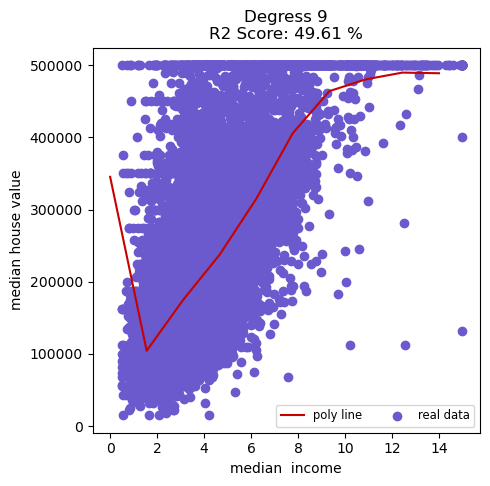

Degree 10 coef_: -0.01
mae: 61430.11697511365
mse: 6849591829.493684
rmse: 82762.26090129295
R2 score: 0.5027831708878094



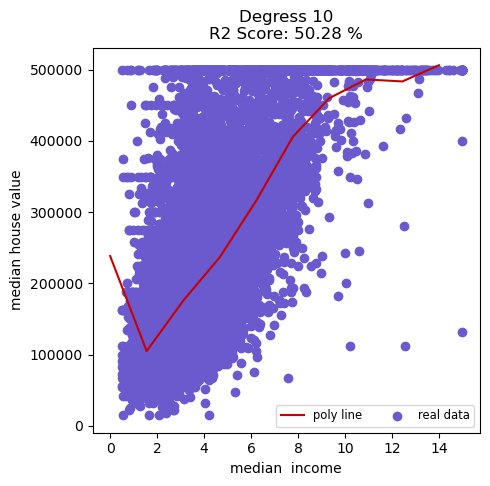

In [91]:
# non scaling
degrees = [x for x in range(1, 11)]


for i in range(len(degrees)):
    plt.figure(figsize=(5,5))
    
    # poly instance
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # model instane already
    pipeline = Pipeline([('polynomial_feature', poly), ('linear_regression', non_model)])
    pipeline.fit(np.array(data_df['median_income']).reshape(-1,1), data_df['median_house_value'].tolist())
    
    poly_feature = np.array(feature).reshape(-1, 1)
    poly_label = label
    
    poly_feature = pipeline.named_steps['polynomial_feature'].transform(np.array(feature).reshape(-1,1))
        
    # train : test = 75 : 25
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, label)
    
    gradient = pipeline.named_steps['linear_regression'].coef_
    
    print(f"Degree {degrees[i]} coef_: {gradient[i]:.2f}")
    
    prediction = pipeline.named_steps['linear_regression'].predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    r_2 = r2_score(y_test, prediction)

    print(f"mae: {mae}")
    print(f"mse: {mse}")
    print(f"rmse: {rmse}")
    print(f"R2 score: {r_2}")
    print()
    
    X_test = np.linspace(0, 14, 10)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), color='#C90000', label='poly line')
    plt.scatter(data_df['median_income'], data_df['median_house_value'], color='#6A5ACD', label='real data')
    
    plt.title(f'Degress {degrees[i]}\nR2 Score: {r_2*100:.2f} %')
    plt.xlabel('median  income')
    plt.ylabel('median house value')
    plt.legend(ncol=2, fontsize='small')
    
    plt.show()

c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Degree 1 coef_: 42054.07
mae: 154075.45914864176
mse: 36337459927.09428
rmse: 190623.87029722767
R2 score: -1.6964171838943196



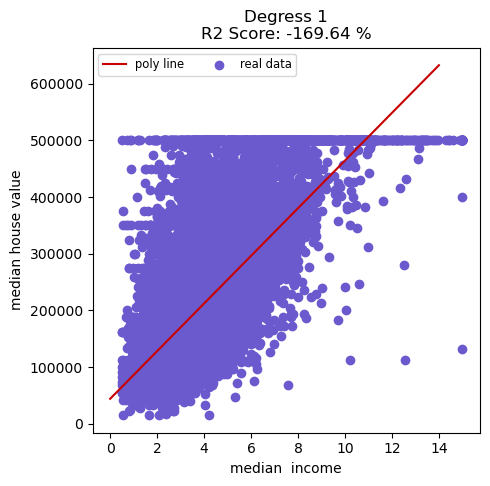

c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but MinMaxScaler is expecting 1 features as input.

<Figure size 500x500 with 0 Axes>

In [92]:
# minmax scaling
degrees = [x for x in range(1, 11)]


for i in range(len(degrees)):
    plt.figure(figsize=(5,5))
    
    # poly instance
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # model instane already
    pipeline = Pipeline([('polynomial_feature', poly), ('linear_regression', mm_model)])
    pipeline.fit(np.array(data_df['median_income']).reshape(-1,1), data_df['median_house_value'].tolist())
    
    poly_feature = np.array(feature).reshape(-1, 1)
    poly_label = label
    
    poly_feature = pipeline.named_steps['polynomial_feature'].transform(np.array().reshape(-1,1))
        
    # train : test = 75 : 25
    X_train, X_test, y_train, y_test = train_test_split(poly_feature, label)
    
    # minmax scaling
    mm_X_train = mm_scaler.transform(X_train)
    mm_X_test = mm_scaler.transform(X_test)
    
    gradient = pipeline.named_steps['linear_regression'].coef_
    
    print(f"Degree {degrees[i]} coef_: {gradient[i]:.2f}")
    
    prediction = pipeline.named_steps['linear_regression'].predict(mm_X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    r_2 = r2_score(y_test, prediction)

    print(f"mae: {mae}")
    print(f"mse: {mse}")
    print(f"rmse: {rmse}")
    print(f"R2 score: {r_2}")
    print()
    
    X_test = np.linspace(0, 14, 10)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), color='#C90000', label='poly line')
    plt.scatter(data_df['median_income'], data_df['median_house_value'], color='#6A5ACD', label='real data')
    
    plt.title(f'Degress {degrees[i]}\nR2 Score: {r_2*100:.2f} %')
    plt.xlabel('median  income')
    plt.ylabel('median house value')
    plt.legend(ncol=2, fontsize='small')
    
    plt.show()

- 다음에 정복하겠다.. 다중회귀... 